In [1]:
!git clone https://github.com/HoanChan/TNCR

Cloning into 'TNCR'...
remote: Enumerating objects: 13229, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 13229 (delta 1), reused 3 (delta 0), pack-reused 13223
Receiving objects: 100% (13229/13229), 1.79 GiB | 30.51 MiB/s, done.
Resolving deltas: 100% (6240/6240), done.
Updating files: 100% (13243/13243), done.


In [2]:
# Lấy danh sách các file xml trong thư mục TNCR

import os
import glob

#lấy danh sách các file xml trong thư mục TNCR
files = glob.glob('/content/TNCR/TNCR/*.xml')

#in ra số lượng file
print(len(files))

#in ra 10 cái
print(files[:10])

6621
['/content/TNCR/TNCR/00fdcbeeab6ab8dd85d73c0105172f0e.xml', '/content/TNCR/TNCR/a6e3ab90e53f37630f762b01c1ee71ca.xml', '/content/TNCR/TNCR/17b18cb7ae4b8d3a728797472fa4ccdc-20.xml', '/content/TNCR/TNCR/f9d56bfd15a0f381b4c97e6e53d42add.xml', '/content/TNCR/TNCR/0d9a6df96ea04d718e5de24eb530e207-8.xml', '/content/TNCR/TNCR/1286c38411a0f8f7809ef4341f99a04c-5.xml', '/content/TNCR/TNCR/184a0d4c7450c1a6036cf68665018926-158.xml', '/content/TNCR/TNCR/6d26b81bc0ae1f96a310f56dfa483757.xml', '/content/TNCR/TNCR/06403c03c31c7cb841334c7e65de98fc-23.xml', '/content/TNCR/TNCR/3e7ea638f529e61e57bca83de81d703a.xml']


In [3]:
# in nội dung 1 file xml

with open(files[5], 'r', encoding='utf-8') as f:
    print(f.read())

<annotation>
	<folder>data_nolines</folder>
	<filename>1286c38411a0f8f7809ef4341f99a04c-5.png</filename>
	<path>C:\Users\d.nurseitov.NORLIST\Desktop\Dataset tables\data_nolines\1286c38411a0f8f7809ef4341f99a04c-5.png</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>1224</width>
		<height>1584</height>
		<depth>1</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>nolines</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>141</xmin>
			<ymin>452</ymin>
			<xmax>813</xmax>
			<ymax>631</ymax>
		</bndbox>
	</object>
	<object>
		<name>nolines</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>139</xmin>
			<ymin>224</ymin>
			<xmax>531</xmax>
			<ymax>327</ymax>
		</bndbox>
	</object>
</annotation>



In [4]:
import glob
import xml.etree.ElementTree as ET

class Anotation:
  def __init__(self, path, folder, objects, size):
      self.path = path # link to image
      self.folder = folder
      self.objects = objects
      self.size = size # [width, height, depth]

class PVOC:
    def __init__(self, name, pose, truncated, difficult, bbox):
        self.name = name
        self.pose = pose
        self.truncated = truncated
        self.difficult = difficult
        self.bndbox = bbox  # [xmin, ymin, xmax, ymax] - PASCAL VOC

def read_xml_files(folder_path):

    # Kiểm tra xem đường dẫn thư mục tồn tại hay không
    if not os.path.exists(folder_path):
        print(f"Thư mục '{folder_path}' không tồn tại.")
        return []

    # Lấy danh sách các file XML trong thư mục
    xml_files = glob.glob(folder_path + '*.xml')

    anos = []  # Danh sách các đối tượng từ các file XML

    # Đọc nội dung của từng file XML và chuyển đổi thành đối tượng
    for xml_file in xml_files:

        # Đọc nội dung file XML và tạo cây phân tích cú pháp
        tree = ET.parse(xml_file)
        root = tree.getroot()

        path = folder_path + root.find('filename').text
        folder = root.find('folder').text
        width = int(root.find('size/width').text)
        height = int(root.find('size/height').text)
        depth = int(root.find('size/depth').text)

        size = [width, height, depth]

        objects=[]

        for object_ in root.iter('object'):

          name = object_.find('name').text
          pose = object_.find('pose').text
          truncated = object_.find('truncated').text
          difficult = object_.find('difficult').text

          ymin, xmin, ymax, xmax = None, None, None, None

          for box in object_.findall("bndbox"):
              ymin = float(box.find("ymin").text)
              xmin = float(box.find("xmin").text)
              ymax = float(box.find("ymax").text)
              xmax = float(box.find("xmax").text)

          bbox = [xmin, ymin, xmax, ymax] # PASCAL VOC

          obj = PVOC(name = name, pose = pose, truncated = truncated, difficult = difficult, bbox = bbox)
          objects.append(obj)

        ano = Anotation(path = path, folder = folder, objects = objects, size = size)
        anos.append(ano)

    return anos


# Thay đổi folder_path thành đường dẫn thư mục chứa các file XML
folder_path = "/content/TNCR/TNCR/"
anos = read_xml_files(folder_path)

# In thông tin các đối tượng
ano = anos[5]
print("Path:", ano.path)
print("Folder:", ano.folder)
print("Size:", ano.size)
print("bbox:")
for obj in ano.objects:
  print("  Name:", obj.name)
  print("  Pose:", obj.pose)
  print("  Truncated:", obj.truncated)
  print("  Difficult:", obj.difficult)
  print("  Bounding Box:", obj.bndbox )
  print("  -----------------------------")

Path: /content/TNCR/TNCR/1286c38411a0f8f7809ef4341f99a04c-5.png
Folder: data_nolines
Size: [1224, 1584, 1]
bbox:
  Name: nolines
  Pose: Unspecified
  Truncated: 0
  Difficult: 0
  Bounding Box: [141.0, 452.0, 813.0, 631.0]
  -----------------------------
  Name: nolines
  Pose: Unspecified
  Truncated: 0
  Difficult: 0
  Bounding Box: [139.0, 224.0, 531.0, 327.0]
  -----------------------------


In [5]:
import cv2
import matplotlib.pyplot as plt

def draw_bounding_boxes(images, indices):
    num_images = len(indices)
    fig, axes = plt.subplots(1, num_images, figsize=(5*3/4*num_images, 5))

    for i, index in enumerate(indices):
        ano = images[index - 1]
        image_path = ano.path
        image = cv2.imread(image_path)

        for obj in ano.objects:
          # Lấy thông tin bounding box
          xmin = obj.bndbox[0]
          ymin = obj.bndbox[1]
          xmax = obj.bndbox[2]
          ymax = obj.bndbox[3]

          # Vẽ bounding box lên ảnh
          cv2.rectangle(image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)

          # Vẽ nhãn lên ảnh
          label = obj.name + ' - ' + obj.pose
          cv2.putText(image, label, (int(xmin), int(ymin)-10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2)

        # Hiển thị ảnh với bounding box trên subplot tương ứng
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i].axis('off')
        axes[i].set_title(ano.folder)

    plt.show()

[918, 3801, 1691, 1956]


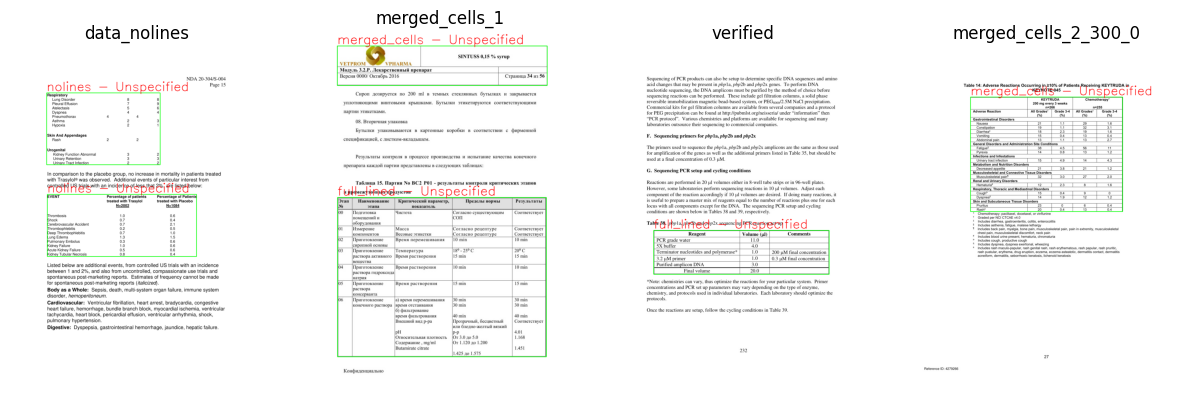

In [6]:
import random
indices_to_draw = random.choices(range(len(anos)), k= 4)
print(indices_to_draw)
draw_bounding_boxes(anos, indices_to_draw)

In [7]:
list_label = []
for a in anos:
  label = [o.name for o in a.objects]
  for p in label:
    if(not p in list_label):
      list_label.append(p)

print(list_label)

['full_lined', 'partial_lined_merged_cells', 'nolines', 'partial_lined', 'merged_cells']


In [8]:
import torchvision

print(torchvision.__version__)

0.16.0+cu118


In [9]:
!git clone https://github.com/microsoft/table-transformer/

Cloning into 'table-transformer'...
remote: Enumerating objects: 753, done.
remote: Counting objects: 100% (432/432), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 753 (delta 337), reused 378 (delta 301), pack-reused 321
Receiving objects: 100% (753/753), 363.46 KiB | 3.67 MiB/s, done.
Resolving deltas: 100% (465/465), done.


Cấu trúc file xml của PubTable-1M như sau:
``` xml
F:/Python/Table Recognition/pubtables-1m/PubTables-1M-Detection/train/PMC6334937_6.xml
<?xml version="1.0" ?>
<annotation>
   <folder/>
   <filename>PMC6334937_6.jpg</filename>
   <path>PMC6334937_6.jpg</path>
   <source>
      <database>PubTables1M-Detection</database>
   </source>
   <size>
      <width>773</width>
      <height>1000</height>
      <depth>3</depth>
   </size>
   <segmented>0</segmented>
   <object>
      <name>table</name>
      <pose>Frontal</pose>
      <truncated>0</truncated>
      <difficult>0</difficult>
      <occluded>0</occluded>
      <bndbox>
         <xmin>45.411764705882355</xmin>
         <ymin>116.33267065491339</ymin>
         <xmax>700.2139892578125</xmax>
         <ymax>205.31640871606692</ymax>
      </bndbox>
   </object>
</annotation>
```


Cấu trúc file xml của TNCR như sau:
``` xml
<annotation>
	<folder>data_nolines</folder>
	<filename>0586c3a01e9e204ecf5133e7c4c236e0-59.png</filename>
	<path>\\192.168.150.246\applications\data_nolines\0586c3a01e9e204ecf5133e7c4c236e0-59.png</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>1224</width>
		<height>1584</height>
		<depth>1</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>nolines</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>226</xmin>
			<ymin>641</ymin>
			<xmax>988</xmax>
			<ymax>778</ymax>
		</bndbox>
	</object>
</annotation>

```

Như vậy là mục `Object`, `fileName` và `Size` là giống như nhau. Đây cũng chính là data cần đọc

In [ ]:
# Import các thư viện cần thiết
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Tạo một lớp dữ liệu để đọc và xử lý các ảnh và nhãn
class TableDataset(torch.utils.data.Dataset):
    def __init__(self, annotations, transform=None):
        self.annotations = annotations # một danh sách các đối tượng Anotation
        self.transform = transform # một đối tượng torchvision.transforms.Compose để biến đổi các ảnh

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        # Đọc ảnh từ đường dẫn
        image = plt.imread(self.annotations[index].path)
        # Lấy kích thước của ảnh
        height, width, _ = image.shape
        # Lấy các đối tượng PVOC từ danh sách objects
        objects = self.annotations[index].objects
        # Tạo một danh sách các nhãn của các bảng
        labels = ['nolines', 'partial_lined', 'full_lined', 'merged_cells', 'partial_lined_merged_cells']
        # Tạo một danh sách các bbox của các bảng
        boxes = []
        # Tạo một danh sách các nhãn số của các bảng
        class_ids = []
        # Duyệt qua các đối tượng PVOC
        for obj in objects:
            # Lấy tọa độ của bbox
            xmin = obj.bndbox[0]
            ymin = obj.bndbox[1]
            xmax = obj.bndbox[2]
            ymax = obj.bndbox[3]
            # Chuẩn hóa tọa độ theo kích thước của ảnh
            xmin = xmin / width
            ymin = ymin / height
            xmax = xmax / width
            ymax = ymax / height
            # Thêm bbox vào danh sách
            boxes.append([xmin, ymin, xmax, ymax])
            # Lấy tên của bảng
            name = obj.name
            # Tìm nhãn số tương ứng với tên
            class_id = labels.index(name) + 1 # nhãn số bắt đầu từ 1
            # Thêm nhãn số vào danh sách
            class_ids.append(class_id)
        # Chuyển đổi các danh sách thành tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        class_ids = torch.as_tensor(class_ids, dtype=torch.int64)
        # Tạo một đối tượng target để lưu trữ các nhãn
        target = {}
        target['boxes'] = boxes
        target['labels'] = class_ids
        # Nếu có biến đổi ảnh, áp dụng biến đổi cho ảnh và target
        if self.transform is not None:
            image, target = self.transform(image, target)
        # Trả về ảnh và target
        return image, target

# Tạo một đối tượng transform để biến đổi các ảnh
transform = torchvision.transforms.Compose([
    # Chuyển đổi ảnh thành tensor
    torchvision.transforms.ToTensor(),
    # Chuẩn hóa ảnh theo giá trị trung bình và độ lệch chuẩn của ImageNet
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Tạo một đối tượng dataset để lưu trữ các ảnh và nhãn
dataset = TableDataset(anos, transform=transform)

# Tạo một đối tượng dataloader để tải dữ liệu theo batch
dataloader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))

# Tạo một mô hình detr chưa được train
model = torchvision.models.detection.detr_resnet50_fpn(pretrained=False, num_classes=6) # số lớp bằng số nhãn cộng 1

# Kiểm tra xem có GPU hay không
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Chuyển mô hình sang GPU nếu có
model.to(device)

# Tạo một đối tượng optimizer để điều chỉnh các trọng số của mô hình
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Tạo một danh sách để lưu trữ giá trị loss của mỗi epoch
losses = []

# Đặt số epoch cho quá trình train
num_epochs = 10

# Bắt đầu quá trình train
for epoch in range(num_epochs):
    # Tạo một đối tượng tqdm để theo dõi quá trình train
    pbar = tqdm(dataloader, desc=f'Epoch {epoch+1}/{num_epochs}')
    # Tạo một biến để lưu trữ tổng loss của mỗi epoch
    epoch_loss = 0
    # Duyệt qua các batch trong dataloader
    for images, targets in pbar:
        # Chuyển ảnh và target sang GPU nếu có
        images = [image.to(device) for image in images]
        targets = [{k: v.to(device) for k, v in target.items()} for target in targets]
        # Tính toán đầu ra của mô hình
        outputs = model(images, targets)
        # Lấy giá trị loss từ đầu ra
        loss = outputs['loss']
        # Cập nhật tổng loss của epoch
        epoch_loss += loss.item()
        # Hiển thị giá trị loss trên tqdm
        pbar.set_postfix(loss=loss.item())
        # Xóa các gradient cũ
        optimizer.zero_grad()
        # Tính toán gradient
        loss.backward()
        # Điều chỉnh các trọng số
        optimizer.step()
    # Thêm giá trị loss của epoch vào danh sách
    losses.append(epoch_loss / len(dataloader))
    # Lưu mô hình lại ở mỗi epoch
    torch.save(model.state_dict(), f'model_epoch_{epoch+1}.pth')

# Vẽ biểu đồ loss theo epoch
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss curve')
plt.show()

AttributeError: ignored

In [ ]:
def save_model(model, filepath):
    torch.save(model.state_dict(), filepath)
    print("Model saved successfully.")

# Sử dụng hàm save_model để lưu mô hình
save_model(model, "model.pth")

In [ ]:
def load_model(model, filepath):
    model.load_state_dict(torch.load(filepath))
    print("Model loaded successfully.")

# Tải mô hình được lưu trước đó
loaded_model = resnet18(weights="ResNet18_Weights.DEFAULT")
load_model(loaded_model, "model.pth")

In [ ]:
import matplotlib.pyplot as plt

def predict_bbox(model, image):
    model.eval()

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])

    # Áp dụng chuyển đổi cho ảnh đầu vào
    image = transform(image).unsqueeze(0)

    # Di chuyển ảnh đến GPU nếu có sẵn
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    image = image.to(device)

    with torch.no_grad():
        # Dự đoán bbox
        outputs = model(image)

    # Trích xuất bbox từ outputs
    predicted_bbox = outputs[0]

    return predicted_bbox

# Sử dụng hàm predict_bbox để dự đoán bbox cho ảnh đầu vào
image = Image.open("/content/PMC2816221_table_3.jpg")
predicted_bbox = predict_bbox(model, image)

In [ ]:
def draw_bbox_on_image(image, bbox):
    # Chuyển đổi bbox từ tensor sang list
    bbox = bbox.tolist()

    # Vẽ bbox lên ảnh
    plt.imshow(image)
    plt.axis('off')
    plt.gca().add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1],
                                      fill=False, edgecolor='red', linewidth=2))
    plt.show()

# Sử dụng hàm draw_bbox_on_image để vẽ bbox lên ảnh và hiển thị
draw_bbox_on_image(image, predicted_bbox)
print(predicted_bbox)